<IPython.core.display.Javascript object>


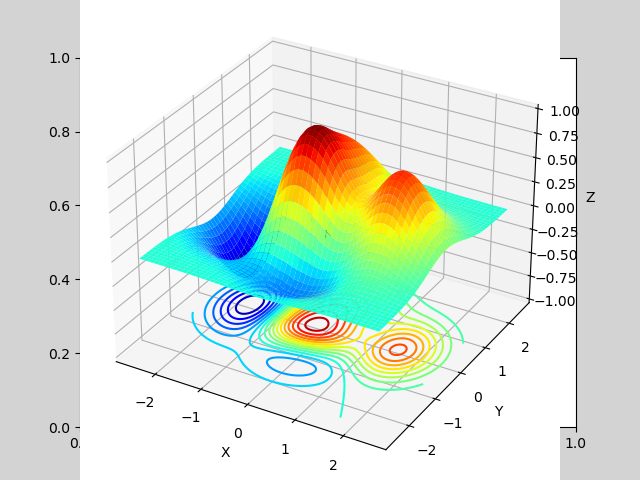

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
# %matplotlib inline

n = 1000
z_max = 1
z_min = -1

def z_(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

def dx(x, y):
    return ((-2*x+x**2-2*x**6-2*x*y**3-0.5+5*x**4)*np.exp(-x**2-y**2))

def dy(x, y):
    return ((-2*y+x*y-2*x**5*y-2*y**4+3*y**2)*np.exp(-x**2-y**2))

x, y = np.meshgrid(np.linspace(-2.5, 2.5, n),
                   np.linspace(-2.5, 2.5, n))

z = (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

# 绘制图片
fig = plt.figure("3D Surface", facecolor="lightgray")
plt.title("3D Surface", fontsize=18)

# 设置为3D图片类型
ax3d = Axes3D(fig)
# ax3d = plt.gca(projection="3d")    # 同样可以实现

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
plt.tick_params(labelsize=10)
ax3d.set_zlim(z_min, z_max) 

ax3d.plot_surface(x, y, z, cstride=20, rstride=20, cmap="jet")
ax3d.scatter(0, 0, 0, c='black', s=30)

# 等高线图，要设置offset，为Z的最小值
# plt.contourf(x,y,z,8,alpha=.75,cmap=plt.cm.cool)
ax3d.contour(x,y,z,20,offset=z_min,cmap='jet')    

plt.show()

# gb

In [44]:
# 学习率
lr = 0.2
# 初始点
x = np.random.uniform(-2.5, 2.5)
y = np.random.uniform(-2.5,2.5)
z0 = z_(x, y)
n = 100

x_list = [x]
y_list = [y]
for i in range(n):
    x = x - lr * dx(x, y)
    x_list.append(x)
    y = y - lr * dy(x, y)
    y_list.append(y)

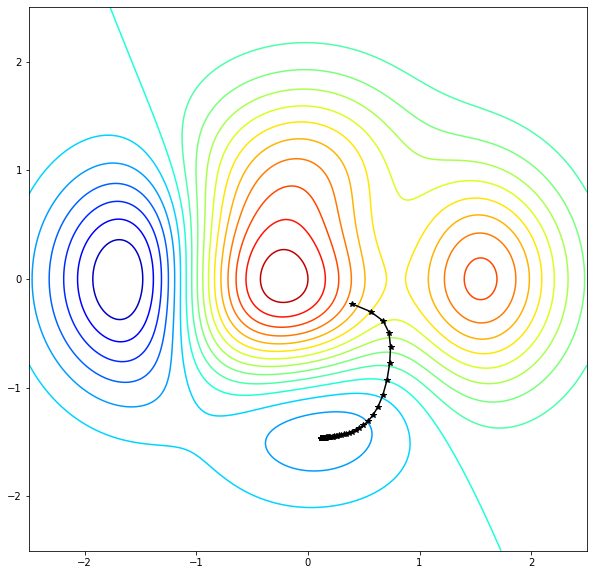

In [45]:
%matplotlib inline
fig2d = plt.figure(figsize=(10,10))
x, y = np.meshgrid(np.linspace(-2.5, 2.5, 1000),
                   np.linspace(-2.5, 2.5, 1000))
plt.contour(x,y,z,20,cmap='jet')
plt.plot(x_list, y_list, '*-',c='black')
plt.show()

# ADAGRAD

In [30]:
# 学习率
lr =1
# 初始点
x = np.random.uniform(-2.5, 2.5)
y = np.random.uniform(-2.5,2.5)
z0 = z_(x, y)
n = 1000

x_list = [x]
y_list = [y]
G1=0
G2=0
for i in range(n):
    G1 += dx(x, y)**2
    ada1 = np.sqrt(G1+1e-8)
    x = x - lr * dx(x, y)/ada1
    x_list.append(x)
    G2 += dy(x, y)**2
    ada2 = np.sqrt(G2+1e-8)
    y = y - lr * dy(x, y)/ada2
    y_list.append(y) 

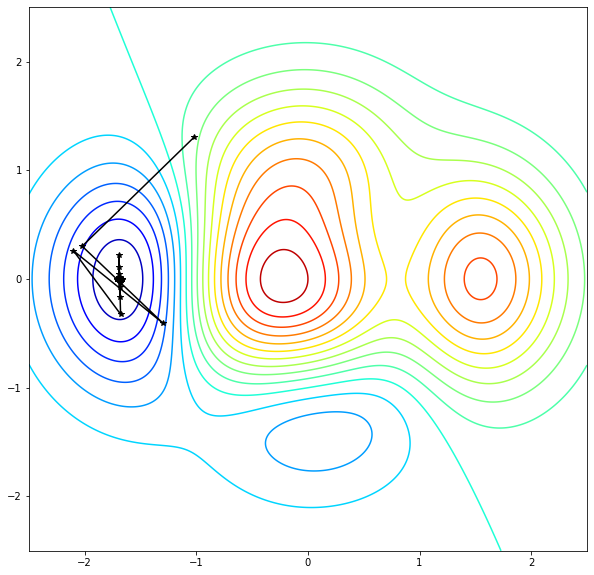

In [31]:
%matplotlib inline
fig2d = plt.figure(figsize=(10,10))
x, y = np.meshgrid(np.linspace(-2.5, 2.5, 1000),
                   np.linspace(-2.5, 2.5, 1000))
plt.contour(x,y,z,20,cmap='jet')
plt.plot(x_list, y_list, '*-',c='black')
plt.show()

# ADAM

In [24]:
# 学习率
lr =0.1
# 初始点
x = np.random.uniform(-2.5, 2.5)
y = np.random.uniform(-2.5,2.5)
z0 = z_(x, y)
n = 200

x_list = [x]
y_list = [y]
beta1 = 0.9    
beta2 = 0.99
G1=0
G2=0
M1=0
M2=0

for i in range(n):
    
    M1 = beta1*M1 + (1-beta1)*dx(x, y)
    M1_ = M1/(1-beta1**(i+1))
    G1 = beta2*G1 + (1-beta2)*dx(x, y)**2
    G1_ = G1 / (1-beta2**(i+1))
    ada1 = np.sqrt(G1_+1e-8)
    x = x - lr * M1/ada1
    x_list.append(x)
    
    M2 = beta1*M2 + (1-beta1)*dy(x, y)
    M2_ = M2/(1-beta1**(i+1))
    G2 = beta2*G2 + (1-beta2)*dy(x, y)**2
    G2_ = G2 / (1-beta2**(i+1))
    ada2 = np.sqrt(G2_+1e-8)
    y = y - lr * M2/ada2
    y_list.append(y)

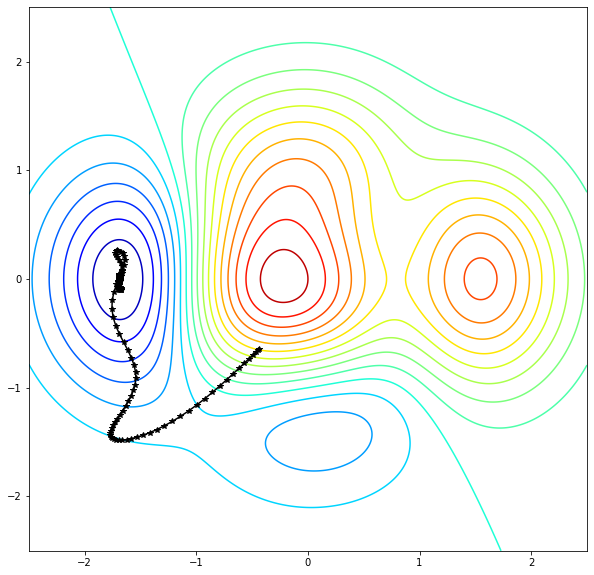

In [25]:
%matplotlib inline
fig2d = plt.figure(figsize=(10,10))
x, y = np.meshgrid(np.linspace(-2.5, 2.5, 1000),
                   np.linspace(-2.5, 2.5, 1000))
plt.contour(x,y,z,20,cmap='jet')
plt.plot(x_list, y_list, '*-',c='black')
plt.show()